In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
bike_rentals = pd.read_csv("../input/bike-rental-hour/bike_rental_hour.csv", index_col="instant")

In [17]:
bike_rentals.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

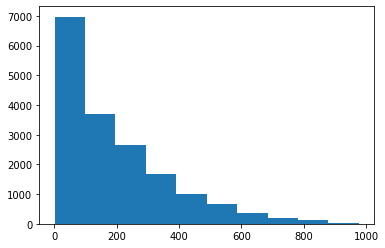

In [18]:
%matplotlib inline


plt.hist(bike_rentals["cnt"])

In [19]:
bike_rentals.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


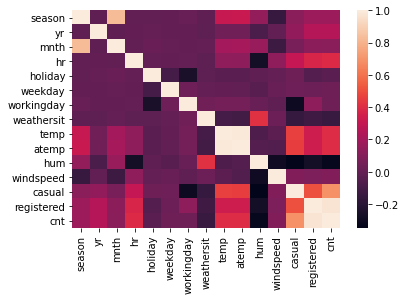

In [20]:
sns.heatmap(bike_rentals.corr())

In [21]:
def hour_car(hour):
    if hour >= 6 & hour < 12:
        return 1
    if hour >= 12 & hour < 18:
        return 2
    if hour >= 18 & hour < 24:
        return 3
    if hour >= 0 & hour < 6:
        return 4

In [22]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(hour_car)

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_rentals, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
features = ["yr", "hr", "temp", "hum"]
X = train[features]
y = train ["cnt"]

X_test = test[features]
y_test = test["cnt"]

In [26]:
model_full = LinearRegression()
model_full.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
train_predictions = model_full.predict(X)
test_predictions = model_full.predict(test[features])

Let's calculate the mean squared error for both our test and training sets

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
train_error = mean_squared_error(train["cnt"], train_predictions)
train_score = model_full.score(X,y)
test_error = mean_squared_error(test["cnt"], test_predictions)
test_score = model_full.score(X_test,y_test)

print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Training error is 20836.831659620922
Training score is 0.3724209739450828
Test error is 19736.38972923161
Test score is 0.37672087946292065


Pretty happy with that.  We're accounting for approx 40% of variance and the error between our test and training set is pretty similar

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [32]:
train_tree_predictions = tree_model.predict(X)
test_tree_predictions =  tree_model.predict(test[features])

In [33]:
train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our decision tree model
Training error is 2303.7173391833894
Training score is 0.9306149462812889
Test error is 14312.136647696287
Test score is 0.5480198726735448


Now, using min_samples_leaf=2

In [34]:
tree_model = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
tree_model.fit(X,y)
train_tree_predictions = tree_model.predict(X)
test_tree_predictions =  tree_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our decision tree model
Training error is 3951.5526782503266
Training score is 0.880984229189374
Test error is 11847.867029724719
Test score is 0.6258419982662867


max_depth=10?

In [35]:
tree_model = DecisionTreeRegressor(random_state=1, max_depth=10)
tree_model.fit(X,y)
train_tree_predictions = tree_model.predict(X)
test_tree_predictions =  tree_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our decision tree model
Training error is 7384.855124459649
Training score is 0.777577500155829
Test error is 8119.992165568457
Test score is 0.7435690293332832


Pretty happy with that last model.  Good eror and accurate on test and train set.  Let's compare to random forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_model = RandomForestRegressor(min_samples_leaf=7)

rf_model.fit(X,y)
train_rf_predictions = rf_model.predict(X)
test_rf_predictions =  rf_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_rf_predictions)
train_score = rf_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_rf_predictions)
test_score = rf_model.score(X_test,y_test)

print("Evaluating our random forest model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our random forest model
Training error is 6391.360473278113
Training score is 0.8075003029967011
Test error is 7806.493639202501
Test score is 0.7534693752670503


In [38]:
rf_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=7)

rf_model.fit(X,y)
train_rf_predictions = rf_model.predict(X)
test_rf_predictions =  rf_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_rf_predictions)
train_score = rf_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_rf_predictions)
test_score = rf_model.score(X_test,y_test)

print("Evaluating our random forest model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our random forest model
Training error is 6458.3631818858485
Training score is 0.8054822661234383
Test error is 7864.309334755044
Test score is 0.751643544080516


Interestingly, we don't see massive increase going from decision tree to random forest

So, using 
features = ["yr", "hr", "temp", "hum"]
Evaluating our random forest model
Training error is 6381.1648412312015
Training score is 0.8078073825438481
Test error is 7844.944677615666
Test score is 0.7522550838117901

Is about as good as it gets.  Let's try throwing all our features at it and seing waht happens.

In [39]:
predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

X_train = train[predictors]
y_train = train ["cnt"]

X_test = test[predictors]
y_test = test["cnt"]

In [40]:
tree_model = DecisionTreeRegressor(random_state=1, max_depth=10)
tree_model.fit(X_train,y_train)
train_tree_predictions = tree_model.predict(X_train)
test_tree_predictions =  tree_model.predict(test[predictors])

train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X_train,y_train)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our decision tree model
Training error is 2400.592049884359
Training score is 0.9276972024714716
Test error is 3514.3311265118077
Test score is 0.8890167227208661


In [41]:
rf_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=7)

rf_model.fit(X_train,y_train)
train_rf_predictions = rf_model.predict(X_train)
test_rf_predictions =  rf_model.predict(test[predictors])

train_error = mean_squared_error(train["cnt"], train_rf_predictions)
train_score = rf_model.score(X_train,y_train)
test_error = mean_squared_error(test["cnt"], test_rf_predictions)
test_score = rf_model.score(X_test,y_test)

print("Evaluating our random forest model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Evaluating our random forest model
Training error is 1489.1400807318114
Training score is 0.9551489834543294
Test error is 2110.6615035693912
Test score is 0.9333448891238825


Turns out adding those features MASSIVELY improves my accuracy!  Let's see what features it's using

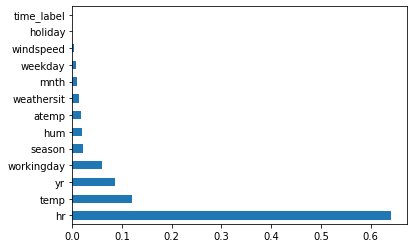

In [42]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')